#1)Sql part..

SQLAlchemy is a library that facilitates the communication between Python programs and databases.

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

df1 = pd.read_csv("C:\\Users\\lenovo\\Downloads\\olympix_data.csv")
db_connection_str = 'mysql+pymysql://root:sys/as sysdba@localhost:3306/olympic'
db_connection = create_engine(db_connection_str)
df1.to_sql('olympix_New', db_connection)

remaining tasks related to mysql have done in mysql workbench...

#2)EXPLORATORY DATA ANALYSIS:
EDA is nothing but analysing data and summarizing the key insights and characteristics of the data.

#Introduction

#The given dataset is about olympics dataset which consists of participates of ages from different countries and different categories of medals they have won and different sports they have appeared for ...

#column with names :1.name: name of the paarticipate , 2.age: age of the participate, 3.country: from where participate belongs to.. , 4.year:which year they appeared for.., 5.dategiven: at which date they participated.., 6.sports:sports that happening in olympics ,7.gold_medals:no.of.gold_medals won ..,8.silvermedals:no.of.silver_medals won..,9.bronzemedals:no.of.bronzemedals won..,total_medals: totalmedals won by the participates..  



#task-1: basic exploration 

checkinglists: 1.Examing the dataset and its shape

 2.checking the datatypes of each columns.

 3.categorical to numerical 

 4.missing values

 5.descriptive summary

#->firstly while begining the process we need to import libraries respective to their work

In [1]:
#importing libraries
import numpy as np #->for mathematical array opeartions 
import pandas as pd #->for dataanalysis
import matplotlib.pyplot as plt#for datavisualizing
import seaborn as sns
%matplotlib inline

#->reading the dataset

In [3]:
df=pd.read_csv("/content/olympix_data.csv")
df


,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1


#->To know the shape of the dataframe

In [4]:
df.shape

(8618, 10)

it shows that dataset contains 8618 rows and 10columns.. 

#->To know the type of the dataframe..

In [5]:
type(df)

pandas.core.frame.DataFrame

#->To know the basic info of the dataset with columns and datatypes also with nullvalues present or not!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


it explians that some of the entries are missing.. and the datatype assigned to each variable is  perfect.

#task-2:handing the missing values ..

In [7]:
df.isna().sum()

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

found total 10 entries are missing in the dataset from 5 in name column and 5 in age column ..

visually not clearly represented due to its small number of missing elements..

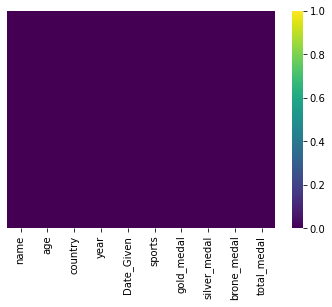

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap="viridis")

due to its less presence without droping it ,filling the missing value with mean value .. 

In [9]:
df["age"]=df["age"].fillna(df["age"].mean())

In [10]:
df.age.isna().sum()

0

#task-3:checking dupliactes in the dataset..

In [11]:
df.duplicated().sum()

3

fount three dupliactes are found ,dropping the duplicates..

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

hence duplicates got dropped..

In [14]:
df.columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

#task-4:remove special characters from name column..

In [15]:
df["name"]

0             Michael Phelps
1             Michael Phelps
2             Michael Phelps
3           Natalie Coughlin
4              Aleksey Nemov
                ...         
8613        Olena Sadovnycha
8614        Kateryna Serdiuk
8615        Wietse van Alten
8616    Sandra Wagner-Sachse
8617               Rod White
Name: name, Length: 8615, dtype: object

In [16]:
df.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


In [17]:
df["name"].unique()

array(['Michael Phelps', 'Natalie Coughlin', 'Aleksey Nemov', ...,
       'Wietse van Alten', 'Sandra Wagner-Sachse', 'Rod White'],
      dtype=object)

In [18]:
df["first_name"]=df["name"].str.split(" ").str[0]
df["last_name"]=df["name"].str.split(" ").str[1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df.drop("name",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df.head(2)

,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal,first_name,last_name
0,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8,Michael,Phelps
1,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8,Michael,Phelps


spliting the name column into first_name,last_name and dropped the existed name column ..

#task-5 visualizing techniques to appropriate columns

->to know the relations b/n each columns performed correlation ,,as it is two types

 1.positively correlated:direct relation of variables towards each other..

 2.negatively correlated:inverse of relationship b/n two variables..

In [21]:
corr=df.corr()
corr

,age,year,gold_medal,silver_medal,brone_medal,total_medal
age,1.000000,-0.006812,-0.029552,-0.011227,-0.015305,-0.072356
year,-0.006812,1.000000,-0.002632,-0.001131,0.009837,0.007224
gold_medal,-0.029552,-0.002632,1.000000,-0.348754,-0.403128,0.399538
silver_medal,-0.011227,-0.001131,-0.348754,1.000000,-0.445669,0.235404
brone_medal,-0.015305,0.009837,-0.403128,-0.445669,1.000000,0.139840
total_medal,-0.072356,0.007224,0.399538,0.235404,0.139840,1.000000


1.age is negatively correlated to every column

2.year is negatively correlated to age,gold_medal,silver_medal and positive towards bronze,total_medal..

3.both gold_medal,silver_medal are mostly negatively correlated to every column

4.bronzemedal is negative towards most of the column except year..

correlation diagram..visually explianing the realtion b/n each and every column..

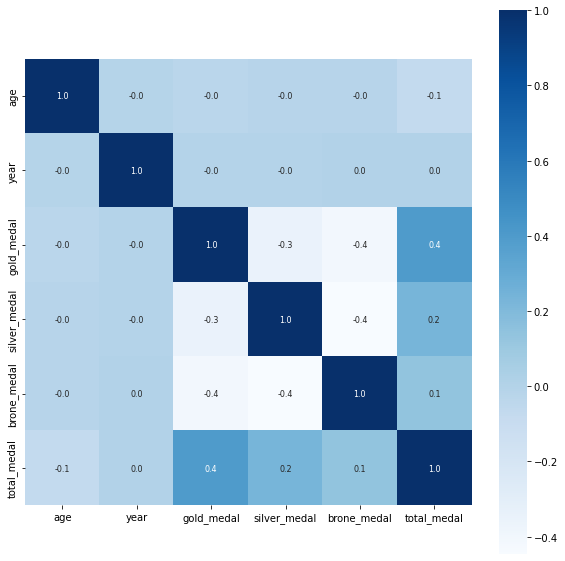

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

#univariate analysis.. taking one dependent varible into the consideration and performing the analysis,visualisation techniques to get the output..

#1.countplot :to know the  no .of.types of ages were participated ..

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


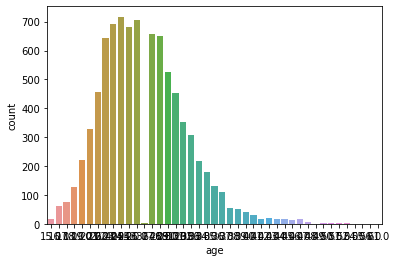

In [23]:
sns.countplot(df["age"])

its shows the distribution is normal with more outliers..

#Bi/multivariate analysis.. taking more than 1 dependent and perform the anlaysis,visualiastion  to find the output..

#1.scatterplot: describes that realtion b/n two numerical variables..like totalmedals,age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


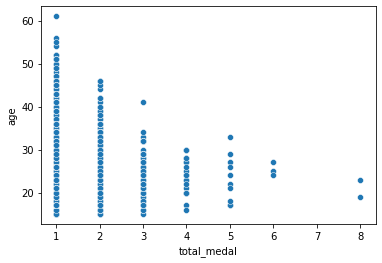

In [24]:
sns.scatterplot(df["total_medal"],df['age'])

clearlty explains that they are independent in nature..

#2.barplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


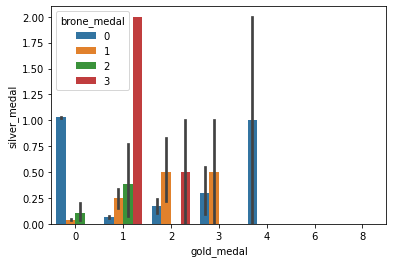

In [27]:
sns.barplot(df["gold_medal"],df["silver_medal"],df["brone_medal"],hue=df["age"])

#3.pairplot: used to relate the realtable variable through graphs..also explains  their relation..

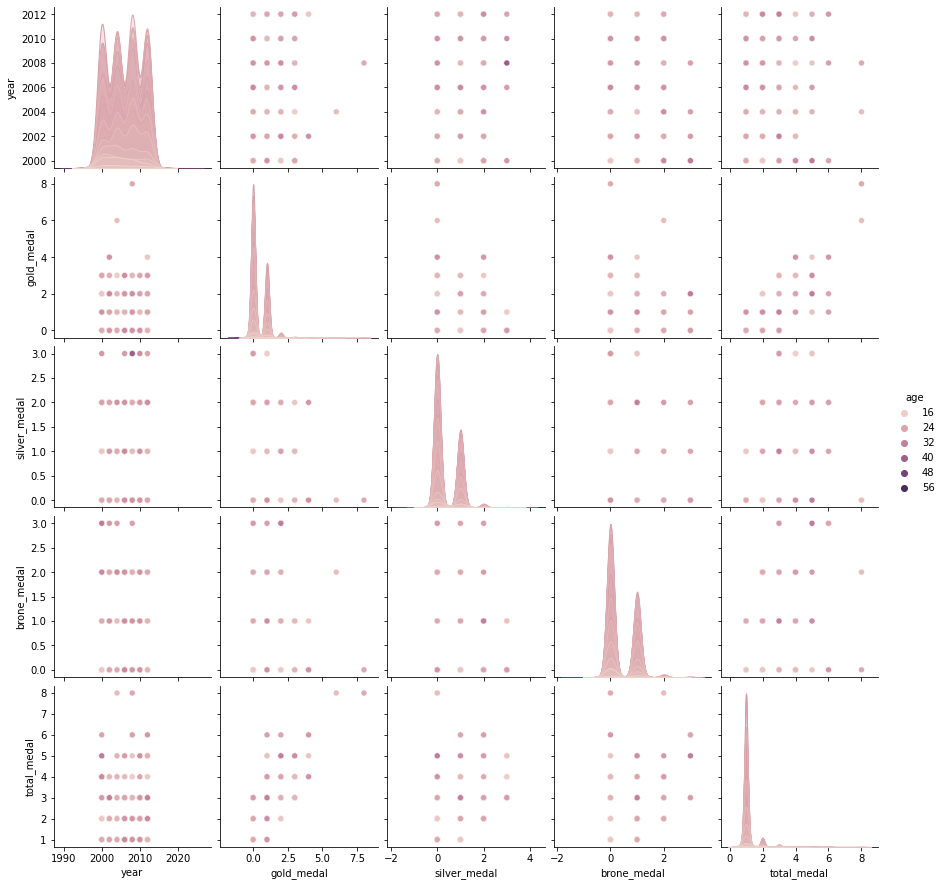

In [28]:
sns.pairplot(df,hue="age")
plt.show()

#task-6 check age in dataset is skewed or symmetric  based on this perform transformation..

(array([5.050e+02, 2.839e+03, 2.699e+03, 1.856e+03, 4.730e+02, 1.600e+02,
        6.700e+01, 1.000e+01, 5.000e+00, 1.000e+00]),
 array([15. , 19.6, 24.2, 28.8, 33.4, 38. , 42.6, 47.2, 51.8, 56.4, 61. ]),
 <a list of 10 Patch objects>)

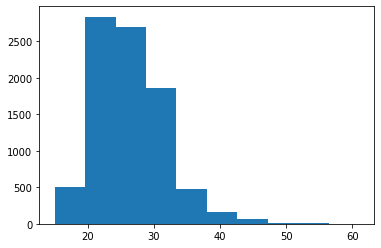

In [29]:
plt.hist(df["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


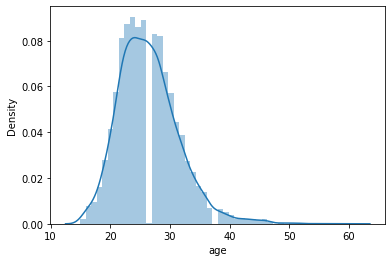

In [30]:
sns.distplot(df["age"])

hence it was symmertric in presence but having outlires...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


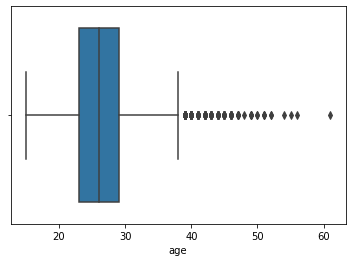

In [31]:
sns.boxplot(df["age"])

#outlier detection and removal using IQR..

In [32]:
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
Q1,Q3

(23.0, 29.0)

In [33]:
IQR=Q3-Q1
IQR

6.0

In [34]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(38.0, 14.0)

In [35]:
df[(df.age<lower_limit)|(df.age>upper_limit)]

,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal,first_name,last_name
64,41.0,United States,2008,8/24/2008,Swimming,0,3,0,3,Dara,Torres
438,46.0,Germany,2008,8/24/2008,Equestrian,1,0,1,2,Heike,Kemmer
439,40.0,Canada,2008,8/24/2008,Equestrian,1,1,0,2,Eric,Lamaze
440,44.0,United States,2008,8/24/2008,Equestrian,1,0,1,2,Beezie,Madden
441,45.0,Germany,2008,8/24/2008,Equestrian,2,0,0,2,Hinrich,Romeike
...,...,...,...,...,...,...,...,...,...,...,...
8569,51.0,Italy,2008,8/24/2008,Archery,0,1,0,1,Ilario,Di
8598,41.0,Japan,2004,8/29/2004,Archery,0,1,0,1,Hiroshi,Yamamoto
8604,43.0,Italy,2000,10-01-2000,Archery,0,1,0,1,Ilario,Di
8608,45.0,United States,2000,10-01-2000,Archery,0,0,1,1,Butch,Johnson


In [36]:
df=df[~(df.age<lower_limit)&~(df.age>upper_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


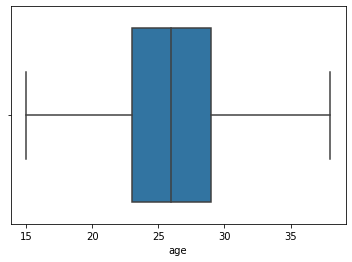

In [37]:
sns.boxplot(df["age"])

hence no outlier found..

#task-7:appropriate numerical measures on each column


can detect numerical measure in the dataframe by correlation technique , describe,it returns only numerical particulars of the dataframe ...

In [38]:
df.describe()

,age,year,gold_medal,silver_medal,brone_medal,total_medal
count,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000
mean,26.034288,2005.979342,0.365784,0.363291,0.377300,1.106375
std,4.485582,4.289793,0.546792,0.511600,0.505367,0.411294
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,38.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


#task-8:list top 10 countries with gold_medal,silver_medal,brone_medal,total_medal...

In [39]:
df.groupby("country")[["gold_medal","silver_medal","brone_medal"]].sum()

,gold_medal,silver_medal,brone_medal
country,,,
Afghanistan,0,0,2
Algeria,2,2,4
Argentina,48,33,56
Armenia,0,1,9
Australia,161,222,218
...,...,...,...
Uruguay,0,1,0
Uzbekistan,5,4,10
Venezuela,1,0,3


top10 countries with gold_medals..

In [40]:
df.groupby("country")["gold_medal"].sum().sort_values(ascending=False).reset_index().head(10)

,country,gold_medal
0,United States,543
1,Russia,233
2,China,233
3,Germany,204
4,Canada,163
5,Australia,161
6,Great Britain,120
7,South Korea,110
8,France,106
9,Netherlands,100


top 10 countries with silver_medals

In [41]:
df.groupby("country")["silver_medal"].sum().sort_values(ascending=False).reset_index().head(10)

,country,silver_medal
0,United States,432
1,Australia,222
2,Russia,219
3,Germany,176
4,China,155
5,Netherlands,129
6,Spain,112
7,Japan,111
8,France,107
9,Italy,98


top 10 countries with bronze medals

In [42]:
df.groupby("country")["brone_medal"].sum().sort_values(ascending=False).reset_index().head(10)

,country,brone_medal
0,Russia,308
1,United States,305
2,Germany,218
3,Australia,218
4,Italy,140
5,China,139
6,Japan,112
7,South Korea,105
8,France,102
9,Canada,99


hence unitedstates has tops the list in all type of medals..

In [43]:
df.head(10)

,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal,first_name,last_name
0,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8,Michael,Phelps
1,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8,Michael,Phelps
2,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6,Michael,Phelps
3,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6,Natalie,Coughlin
4,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6,Aleksey,Nemov
5,24.0,Australia,2012,08-12-2012,Swimming,1,3,1,5,Alicia,Coutts
6,17.0,United States,2012,08-12-2012,Swimming,4,0,1,5,Missy,Franklin
7,27.0,United States,2012,08-12-2012,Swimming,2,2,1,5,Ryan,Lochte
8,22.0,United States,2012,08-12-2012,Swimming,3,1,1,5,Allison,Schmitt
9,21.0,United States,2004,8/29/2004,Swimming,2,2,1,5,Natalie,Coughlin


#saving the changes into a file..

In [ ]:
df.to_csv('olympix1.csv')

In [ ]:
df1=pd.read_csv("/content/olympix1.csv")

In [ ]:
df1.head(2)

,Unnamed: 0,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal,first_name,last_name
0,0,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8,Michael,Phelps
1,1,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8,Michael,Phelps


cleaned the dataset & saved the file with name olympix1 in csv format to perform further analysis..